# Exploring the MovieLens 1M Dataset

#### Based on an example from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6,000 users on 4,000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by two colons (*::*).


[Download the original dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

To make things easier, we have merged these datasets and separated the genres for you. To download the modified dataset that you can use to complete the assignment, see the #assignments slack channel.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next we will import our dataset

In [3]:
data = pd.read_csv('/Users/ryanmartin/Desktop/movie_lens_genre_separated.tsv', sep='\t')

In [4]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [5]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [6]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [7]:
ratings_by_title = data.groupby('title').size()

In [8]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [9]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [10]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [11]:
mean_ratings = mean_ratings.loc[active_titles]

In [12]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


To see the top films among female viewers, we can sort by the F column in descending order:

In [13]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [14]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


Likewise, for males:

In [15]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [16]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [17]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [18]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [19]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [20]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


### Better formating the occupations and age groups

In [21]:
# More info on the dataset can be found here: http://files.grouplens.org/datasets/movielens/ml-1m-README.txt

occupation_dict = { 
    0: "not specified", 
    1: "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}

age_dict = {
    1:  "Under 18",
    18:  "18-24",
    25:  "25-34",
    35:  "35-44",
    45:  "45-49",
    50:  "50-55",
    56:  "56+"
}

In [22]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [23]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


# An aggregate of the movie ratings for each particular genre


In [24]:
genre_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')
genre_ratings

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


In [25]:
#An aggregate of the movie ratings for each particular genre, sorted by rating
genre_ratings = data.pivot_table('rating', index='genres', aggfunc='mean')
genre_ratings.sort_values(by='rating', ascending = False)

,rating
genres,
Film-Noir,4.075188
Documentary,3.933123
War,3.893327
Drama,3.766332
Crime,3.708679
Animation,3.684895
Mystery,3.668102
Musical,3.665519
Western,3.637770


# The top 5 highest ranked genres by occupation

In [26]:
#The top 5 highest ranked genres by occupation starter table
occupation_genre_ratings = data.pivot_table(values='rating',index='genres',columns='occupation')
occupation_genre_ratings.head()

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011


In [28]:

#These data frames compile together to form one data frame containing the top five genres by occupation

artist_genres = occupation_genre_ratings.sort_values(by='artist', ascending=False).head()
artist_list = list(artist_genres.index.values)[0:5]
a = artist_list[0]
b = artist_list[1]
c = artist_list[2]
d = artist_list[3]
e = artist_list[4]
Artist = pd.DataFrame({"Artist": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

K12_genres = occupation_genre_ratings.sort_values(by='K-12 student', ascending=False).head()
K12_list = list(K12_genres.index.values)[0:5]
a = K12_list[0]
b = K12_list[1]
c = K12_list[2]
d = K12_list[3]
e = K12_list[4]
K12 = pd.DataFrame({"K-12 student": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

academic_genres = occupation_genre_ratings.sort_values(by='academic/educator', ascending=False).head()
academic_list = list(academic_genres.index.values)[0:5]
a = academic_list[0]
b = academic_list[1]
c = academic_list[2]
d = academic_list[3]
e = academic_list[4]
Academic = pd.DataFrame({"academic/educator": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

admin_genres = occupation_genre_ratings.sort_values(by='clerical/admin', ascending=False).head()
admin_list = list(admin_genres.index.values)[0:5]
a = admin_list[0]
b = admin_list[1]
c = admin_list[2]
d = admin_list[3]
e = admin_list[4]
Admin = pd.DataFrame({"clerical/admin": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])
college_genres = occupation_genre_ratings.sort_values(by='college/grad student', ascending=False).head()
college_list = list(college_genres.index.values)[0:5]
a = college_list[0]
b = college_list[1]
c = college_list[2]
d = college_list[3]
e = college_list[4]
College = pd.DataFrame({"college/grad student": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

customer_service_genres = occupation_genre_ratings.sort_values(by='customer service', ascending=False).head()
cs_list = list(customer_service_genres.index.values)[0:5]
a = cs_list[0]
b = cs_list[1]
c = cs_list[2]
d = cs_list[3]
e = cs_list[4]
CS = pd.DataFrame({"customer service": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

doctor_genres = occupation_genre_ratings.sort_values(by='doctor/health care', ascending=False).head()
dr_list = list(doctor_genres.index.values)[0:5]
a = dr_list[0]
b = dr_list[1]
c = dr_list[2]
d = dr_list[3]
e = dr_list[4]
Doctor = pd.DataFrame({"doctor/health care": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

executive_genres = occupation_genre_ratings.sort_values(by='executive/managerial', ascending=False).head()
executive_list = list(executive_genres.index.values)[0:5]
a = executive_list[0]
b = executive_list[1]
c = executive_list[2]
d = executive_list[3]
e = executive_list[4]
ex = pd.DataFrame({"executive/managerial": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

farmer_genres = occupation_genre_ratings.sort_values(by='farmer', ascending=False).head()
farmer_list = list(farmer_genres.index.values)[0:5]
a = farmer_list[0]
b = farmer_list[1]
c = farmer_list[2]
d = farmer_list[3]
e = farmer_list[4]
farmer = pd.DataFrame({"farmer": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

homemaker_genres = occupation_genre_ratings.sort_values(by='homemaker', ascending=False).head()
homemaker_list = list(homemaker_genres.index.values)[0:5]
a = homemaker_list[0]
b = homemaker_list[1]
c = homemaker_list[2]
d = homemaker_list[3]
e = homemaker_list[4]
homemaker = pd.DataFrame({"homemaker": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

not_specified_genres = occupation_genre_ratings.sort_values(by='not specified', ascending=False).head()
not_specified_list = list(not_specified_genres.index.values)[0:5]
a = not_specified_list[0]
b = not_specified_list[1]
c = not_specified_list[2]
d = not_specified_list[3]
e = not_specified_list[4]
not_specified = pd.DataFrame({"not specified": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

programmer_genres = occupation_genre_ratings.sort_values(by='programmer', ascending=False).head()
programmer_list = list(programmer_genres.index.values)[0:5]
a = programmer_list[0]
b = programmer_list[1]
c = programmer_list[2]
d = programmer_list[3]
e = programmer_list[4]
programmer = pd.DataFrame({"programmer": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

retired_genres = occupation_genre_ratings.sort_values(by='retired', ascending=False).head()
retired_list = list(retired_genres.index.values)[0:5]
a = retired_list[0]
b = retired_list[1]
c = retired_list[2]
d = retired_list[3]
e = retired_list[4]
retired = pd.DataFrame({"retired": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

sales_marketing_genres = occupation_genre_ratings.sort_values(by='sales/marketing', ascending=False).head()
sales_marketing_list = list(sales_marketing_genres.index.values)[0:5]
a = sales_marketing_list[0]
b = sales_marketing_list[1]
c = sales_marketing_list[2]
d = sales_marketing_list[3]
e = sales_marketing_list[4]
sales_marketing = pd.DataFrame({"sales_marketing": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

scientist_genres = occupation_genre_ratings.sort_values(by='scientist', ascending=False).head()
scientist_list = list(scientist_genres.index.values)[0:5]
a = scientist_list[0]
b = scientist_list[1]
c = scientist_list[2]
d = scientist_list[3]
e = scientist_list[4]
scientist = pd.DataFrame({"scientist": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

self_employed_genres = occupation_genre_ratings.sort_values(by='self-employed', ascending=False).head()
self_employed_list = list(self_employed_genres.index.values)[0:5]
a = self_employed_list[0]
b = self_employed_list[1]
c = self_employed_list[2]
d = self_employed_list[3]
e = self_employed_list[4]
self_employed = pd.DataFrame({"self_employed": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])


technician_engineer_genres = occupation_genre_ratings.sort_values(by='technician/engineer', ascending=False).head()
technician_engineer_list = list(technician_engineer_genres.index.values)[0:5]
a = technician_engineer_list[0]
b = technician_engineer_list[1]
c = technician_engineer_list[2]
d = technician_engineer_list[3]
e = technician_engineer_list[4]
technician_engineer = pd.DataFrame({"technician/engineer": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

tradesman_craftsman_genres = occupation_genre_ratings.sort_values(by='tradesman/craftsman', ascending=False).head()
tradesman_craftsman_list = list(tradesman_craftsman_genres.index.values)[0:5]
a = tradesman_craftsman_list[0]
b = tradesman_craftsman_list[1]
c = tradesman_craftsman_list[2]
d = tradesman_craftsman_list[3]
e = tradesman_craftsman_list[4]
tradesman_craftsman = pd.DataFrame({"tradesman/craftsman": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

unemployed_genres = occupation_genre_ratings.sort_values(by='unemployed', ascending=False).head()
unemployed_list = list(unemployed_genres.index.values)[0:5]
a = unemployed_list[0]
b = unemployed_list[1]
c = unemployed_list[2]
d = unemployed_list[3]
e = unemployed_list[4]
unemployed = pd.DataFrame({"unemployed": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

writer_genres = occupation_genre_ratings.sort_values(by='writer', ascending=False).head()
writer_list = list(writer_genres.index.values)[0:5]
a = writer_list[0]
b = writer_list[1]
c = writer_list[2]
d = writer_list[3]
e = writer_list[4]
writer = pd.DataFrame({"writer": [a,b,c,d,e]},
             index= ["1","2","3","4","5"])

# join all the data frames together into one data frame
one = K12.join(Academic)
two = Artist.join(Admin)
three = College.join(CS)
four = Doctor.join(ex)
five = farmer.join(homemaker)
six = not_specified.join(programmer)
seven = retired.join(sales_marketing)
eight = scientist.join(self_employed)
nine = technician_engineer.join(tradesman_craftsman)
ten = unemployed.join(writer)
first = one.join(two)
second = three.join(four)
third = five.join(six)
fourth = seven.join(eight)
fifth = nine.join(ten)
last_one = first.join(second)
last_two = third.join(fourth)
final_one = last_one.join(last_two)
final = final_one.join(fifth)
final


,K-12 student,academic/educator,Artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,not specified,programmer,retired,sales_marketing,scientist,self_employed,technician/engineer,tradesman/craftsman,unemployed,writer
1,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Documentary,Film-Noir,Documentary,War,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir,Film-Noir
2,War,Documentary,Documentary,War,Documentary,Documentary,Film-Noir,Documentary,Film-Noir,Musical,Documentary,War,War,Documentary,Documentary,Documentary,Documentary,War,Documentary,Documentary
3,Drama,War,War,Musical,War,Animation,War,War,War,Documentary,War,Documentary,Documentary,War,War,War,War,Western,War,War
4,Crime,Drama,Drama,Documentary,Drama,War,Drama,Drama,Western,Animation,Drama,Drama,Drama,Drama,Animation,Drama,Drama,Animation,Crime,Animation
5,Mystery,Musical,Mystery,Animation,Crime,Drama,Crime,Crime,Drama,Drama,Animation,Western,Mystery,Animation,Drama,Crime,Animation,Drama,Drama,Musical


# The most popular (with most ratings) movie by age group.

In [83]:
#Index of movies with over 8000 ratings
active_titles2 = ratings_by_title.index[ratings_by_title > 8000]
active_titles2

Index(['Alien (1979)', 'E.T. the Extra-Terrestrial (1982)',
       'Jurassic Park (1993)', 'L.A. Confidential (1997)',
       'Men in Black (1997)', 'Princess Bride, The (1987)',
       'Star Wars: Episode I - The Phantom Menace (1999)',
       'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)'],
      dtype='object', name='title')

In [84]:
most_ratings = data.pivot_table('rating', index='title', columns=data['age'], aggfunc='sum')

In [85]:
#The most popular (with most ratings) movie by age group data to be used for formatting.
age_titles = most_ratings.loc[active_titles2]
age_titles[:5]

age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
title,,,,,,,
Alien (1979),4832.0,13540.0,7812.0,3132.0,2548.0,1156.0,656.0
E.T. the Extra-Terrestrial (1982),5976.0,14024.0,7624.0,3252.0,2580.0,1436.0,1096.0
Jurassic Park (1993),6066.0,11106.0,5898.0,2577.0,2181.0,1326.0,1017.0
L.A. Confidential (1997),6916.0,14920.0,7404.0,3420.0,3268.0,1912.0,776.0
Men in Black (1997),7440.0,14236.0,7564.0,2968.0,2880.0,1344.0,1536.0


In [86]:
# A Data Frame showing the most popular title per age group
top_titles_24 = age_titles.sort_values(by='18-24', ascending=False).head()
top_titles_25 = age_titles.sort_values(by='25-34', ascending=False).head()
top_titles_45 = age_titles.sort_values(by='45-49', ascending=False).head()
top_titles_50 = age_titles.sort_values(by='50-55', ascending=False).head()
top_titles_over_56 = age_titles.sort_values(by='56+', ascending=False).head()
top_titles_under18 = age_titles.sort_values(by='Under 18', ascending=False).head()

titles1 = list(top_titles_24.index.values)[0]
titles2 = list(top_titles_25.index.values)[0]
titles3 = list(top_titles_45.index.values)[0]
titles4 = list(top_titles_50.index.values)[0]
titles5 = list(top_titles_over_56.index.values)[0]
titles6 = list(top_titles_under18.index.values)[0]

titles = [titles1, titles2, titles3, titles4, titles5, titles6]
titles_data_frame = [x for x in titles]

pd.DataFrame([titles_data_frame],
             index = ['title'],
             columns =['18-24', '25-34', '45-49', '50-55', '56+', 'under 18'])
              

,18-24,25-34,45-49,50-55,56+,under 18
title,Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode VI - Return of the Jedi (1983)


# A breakdown of movie ratings by occupation, using any movie of your choice
# Star Wars: Episode IV - A New Hope (1977)

In [87]:
star_wars_data = data[data['title']=="Star Wars: Episode IV - A New Hope (1977)"].pivot_table('rating', index=data['occupation'], aggfunc='mean').sort_values(by='rating', ascending=False)
star_wars_data


,rating
occupation,
programmer,4.619266
scientist,4.600000
doctor/health care,4.575472
technician/engineer,4.525926
sales/marketing,4.523179
tradesman/craftsman,4.514286
customer service,4.483871
self-employed,4.469565
executive/managerial,4.460411


In [88]:
# Top Five Occupations that like Star Wars the most
data[data['title']=="Star Wars: Episode IV - A New Hope (1977)"].pivot_table('rating', index=data['occupation'], aggfunc='mean').sort_values(by='rating', ascending =False).head()

,rating
occupation,
programmer,4.619266
scientist,4.600000
doctor/health care,4.575472
technician/engineer,4.525926
sales/marketing,4.523179


# A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [51]:
def user_info(user_id):
    
    age = data.loc[data['user_id']==user_id]['age'].head(1)
    age_list = list(age)
    
    occupation = data.loc[data['user_id']==user_id]['occupation'].head(1)
    occupation_list = list(occupation)
    
    rating = data.loc[data['user_id']==user_id]['rating'].mean()
    
    max_title=data[(data['user_id']==user_id) & (data['rating']== data.loc[data['user_id']==user_id]['rating'].max())]['title'].head(1)
    max_title_list = list(max_title)
    
    min_title=data[(data['user_id']==user_id) & (data['rating']== data.loc[data['user_id']==user_id]['rating'].min())]['title'].head(1)
    min_title_list = list(min_title)
    
    return pd.DataFrame([[age_list[0], occupation_list[0], rating, max_title_list[0], min_title_list[0]]],
                        index = ['person'],
                        columns = ['age', 'occupation', 'average rating', 'highest rated', 'lowest rated'])

user_info(902)




,age,occupation,average rating,highest rated,lowest rated
person,56+,not specified,4.357143,Jurassic Park (1993),Meteor (1979)


# Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [37]:
import seaborn as sns
%matplotlib inline

This heatmap shows the highest rated movies based on people's occupation. The row with the lightest yellow color shows that people across all occupations tend to rate "Film Noir" positively. Right below the "Film Noir" row is the row representing the ratings for "Horror" films. Because those boxes are darker, it seems that most people rate "Horror" movies negatively. 

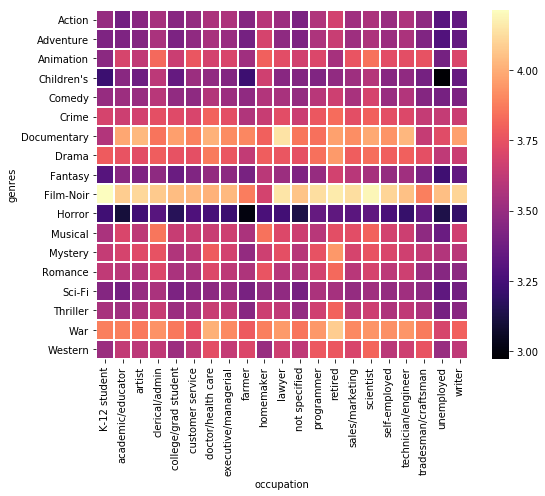

In [42]:
plt.figure(figsize=(8,7))
sns.heatmap(occupation_genre_ratings,cmap='magma',linecolor='white',linewidths=1)
plt.tight_layout()
plt.show()

This cluster map shows the distribution of ratings for the genres by occupation. The areas in red show which genres are viewed most favorably by people according to their occupation. "Film Noir" seems to be a favorite amoung most people no matter their background. Conversly, people tend to dislke horror movies the most, as seen in blue. It also seems that people who are unemployed dislike horror movies the least; but, like everyone else, they enjoy "Film Noir" movies the most. Another interesting observation is that people who are homemakers tend to like musicals more than other occupations. 

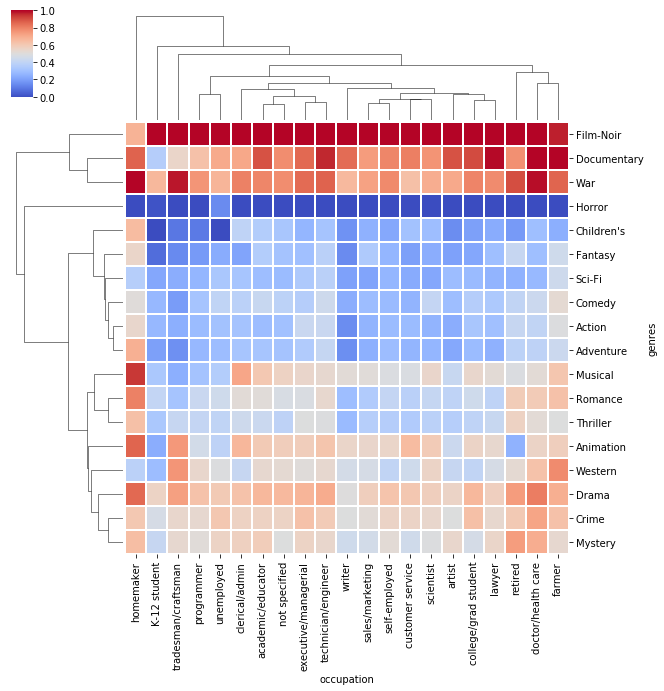

In [39]:
sns.clustermap(occupation_genre_ratings,cmap='coolwarm',linecolor='white',linewidths=1,standard_scale=1)

This boxplot shows the size of the Inter Quartile Range (IQR) of each genre according to people's ratings. "Film Noir" has a small IQR with a range of ratings between 4.0 and 5.0, which means that those who have reviewed movies tend to rate "Film Noir" as the best. There are also a few outliers who gave poor reviews to some "Film Noir" classics. Horror films, however, show a wider IQR and a lower median rating of a 3.0. Generally the IQR goes from 3.0 to 4.0 with some outliers giving movies a 1.0 rating.

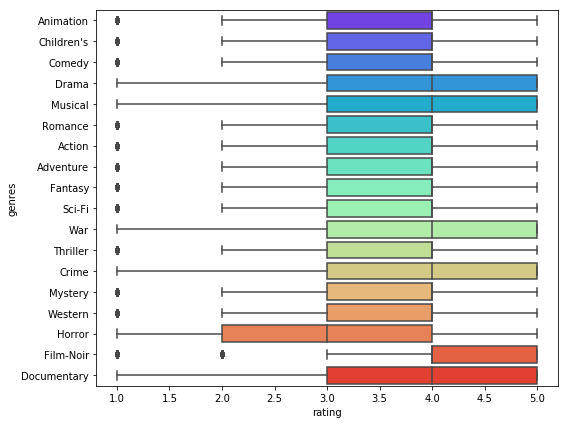

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(x="rating", y="genres", data=data,palette='rainbow')
plt.tight_layout()
plt.show()

Among the genre ratings, there are some markedly different ratings amoung people with different careers. For instance, in taking the differences in rating movies between Doctor/ Health care workers and people who are unemployed, we see that people who are unemployed tend to enjoy Film Noir, War, SciFi, Crime, and Comedy more than Doctors/ Health Care workers. And the most divisive differences between those two careers are Children's, War, Musical, Documentary, and Animation genres, which are the genres that Doctor's and Healthcare workers like the most. 

In [94]:
 occupation_genre_ratings['diff'] = occupation_genre_ratings['unemployed'] - occupation_genre_ratings['doctor/health care']

In [95]:
diff_occupation = occupation_genre_ratings.sort_values(by='diff')
diff_occupation[:5]

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer,diff
genres,,,,,,,,,,,,,,,,,,,,,
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509,-0.512313
War,3.880144,3.882950,3.859375,3.927692,3.864107,3.756677,4.005054,3.911164,3.780488,3.879518,...,3.941926,4.085757,3.907317,3.933114,3.926107,3.939708,3.873449,3.693103,3.798393,-0.311951
Musical,3.556738,3.701586,3.613322,3.857049,3.642227,3.641892,3.650061,3.665550,3.560000,3.845821,...,3.598214,3.736486,3.733026,3.805987,3.678006,3.659684,3.475949,3.360771,3.669849,-0.289290
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914,-0.285972
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623,-0.285930


In [96]:
diff_occupation[::-1][:5]

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer,diff
genres,,,,,,,,,,,,,,,,,,,,,
Film-Noir,4.212766,4.082613,4.114000,4.075332,4.039548,4.027356,4.011348,4.030027,3.878049,3.684615,...,4.130357,4.161058,4.126050,4.190476,4.105583,4.050861,3.882653,4.044444,4.104603,0.033097
Horror,3.237795,3.104548,3.243743,3.304525,3.166907,3.276987,3.256988,3.223292,3.010989,3.267528,...,3.347877,3.328234,3.315217,3.336032,3.266436,3.208789,3.341662,3.136126,3.201472,-0.120862
Sci-Fi,3.443795,3.396863,3.500281,3.555942,3.419123,3.454210,3.471823,3.501961,3.405455,3.492958,...,3.561528,3.544457,3.492470,3.529564,3.493593,3.529858,3.473520,3.330855,3.390184,-0.140968
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598,-0.168772
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011,-0.184401


It is also significant to see which occupations gave the most movie ratings. Out of all occupations, College/ grad students were most interested in giving their opinions on the quality of films; whereas, farmers were least interested in giving movie ratings.

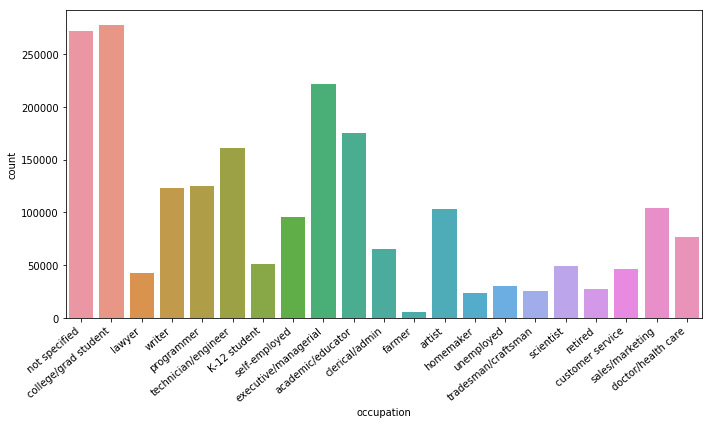

In [46]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="occupation", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

It is also interesting to see which genres recieved the most ratings. 

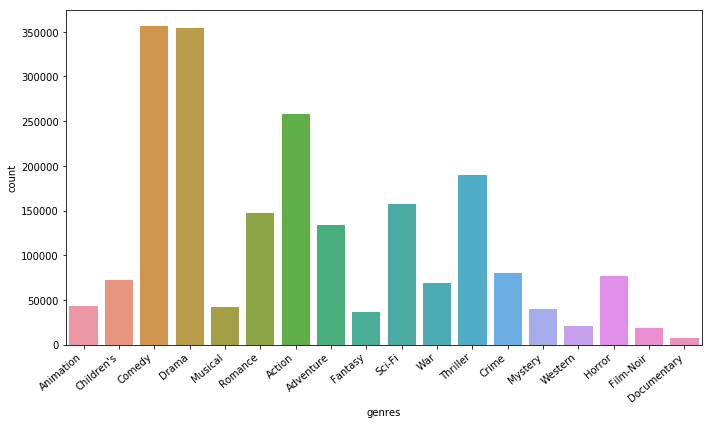

In [47]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="genres", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Those who gave movie ratings mostly identified as male.

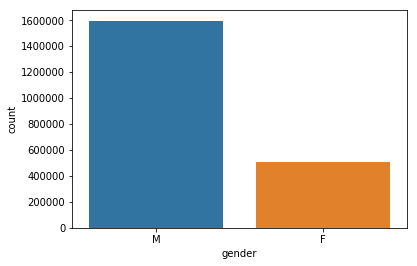

In [99]:
sns.countplot(x='gender', data=data)